In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import plotnine as p9
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# To analyze the correlation between pA and rM soRNA-seq.
# Align the log2 value (cKO vs ctr) from differential analysis of pA and rM at GV stage.
# Output: the dot plot of log2FC of pA and rM.
# Output: df_rM_pA_GV_short

In [6]:
# solo rM-seq, yg samples.
df_rM_GV = pd.read_csv("../raw/RNAseq/dis3l2_cKO_vs_ctr_ERCC_rM.csv",skiprows=1, 
                    names=['gene_id', 'baseMean','log2FC','lfcSE','stat','p','padj'])
df_rM_GV
df_rM_GV_up = df_rM_GV[(df_rM_GV['log2FC']>0)&(df_rM_GV['padj']<0.01)]
df_rM_GV_dn = df_rM_GV[(df_rM_GV['log2FC']<0)&(df_rM_GV['padj']<0.01)]
df_rM_GV_up #8372
df_rM_GV_dn #669


,gene_id,baseMean,log2FC,lfcSE,stat,p,padj
65,ENSMUSG00000000440,349.126812,-0.977711,0.199660,-4.896893,9.736399e-07,4.279771e-06
70,ENSMUSG00000000531,71.291872,-2.176036,0.430850,-5.050567,4.405005e-07,2.030215e-06
91,ENSMUSG00000000701,1324.783583,-1.911844,0.196534,-9.727820,2.294567e-22,4.242965e-21
141,ENSMUSG00000001039,224.477219,-0.698860,0.213731,-3.269813,1.076186e-03,2.884092e-03
162,ENSMUSG00000001157,2414.611305,-0.670701,0.173671,-3.861897,1.125099e-04,3.623098e-04
...,...,...,...,...,...,...,...
21198,ENSMUSG00000117734,38.002165,-1.651568,0.561970,-2.938890,3.293902e-03,7.977618e-03
21249,ENSMUSG00000117972,3.034763,-4.705819,1.401347,-3.358069,7.848904e-04,2.160698e-03
21256,ENSMUSG00000117994,237.319951,-0.826477,0.229402,-3.602746,3.148732e-04,9.359936e-04
21298,ENSMUSG00000118180,234.193775,-1.636658,0.245647,-6.662633,2.689650e-11,2.015917e-10


In [7]:
# pA-seq based on pA all GV and MII.
df_pA_GV = pd.read_csv("../raw/RNAseq/dis3l2_cKO_vs_ctr_ERCC_pA.csv",skiprows=1, 
                    names=['gene_id', 'baseMean','log2FC','lfcSE','stat','p','padj'])
df_pA_GV
df_pA_GV_up = df_pA_GV[(df_pA_GV['log2FC']>0)&(df_pA_GV['padj']<0.01)]
df_pA_GV_dn = df_pA_GV[(df_pA_GV['log2FC']<0)&(df_pA_GV['padj']<0.01)]
df_pA_GV_dn #2349

df_pA_GV_up #935


,gene_id,baseMean,log2FC,lfcSE,stat,p,padj
23,ENSMUSG00000000197,38.722449,1.778252,0.471871,3.768516,1.642209e-04,1.398827e-03
46,ENSMUSG00000000340,138.891097,1.373351,0.392972,3.494781,4.744513e-04,3.243914e-03
58,ENSMUSG00000000416,221.483897,1.374745,0.287225,4.786306,1.698793e-06,3.203598e-05
72,ENSMUSG00000000555,36.133684,1.912737,0.558407,3.425343,6.140236e-04,4.015595e-03
73,ENSMUSG00000000560,9.534302,5.263147,1.099627,4.786302,1.698820e-06,3.203598e-05
...,...,...,...,...,...,...,...
18594,ENSMUSG00000118127,6.938304,2.867821,0.841989,3.406006,6.592085e-04,4.245151e-03
18597,ENSMUSG00000118134,15.406249,2.611566,0.531809,4.910722,9.074158e-07,1.888861e-05
18601,ENSMUSG00000118189,4.439088,3.422529,0.998163,3.428826,6.061970e-04,3.973670e-03
18619,ENSMUSG00000118296,2.255583,4.114760,1.169087,3.519634,4.321424e-04,3.032199e-03


In [11]:
# merge two df:
df_rM_pA_GV = pd.merge(left=df_rM_GV, right=df_pA_GV, left_on='gene_id',right_on='gene_id')
df_rM_pA_GV

# only pick up columns of gene ID, log2FC and padj
df_rM_pA_GV_short = df_rM_pA_GV[['gene_id','log2FC_x','padj_x','log2FC_y','padj_y']]
df_rM_pA_GV_short.columns = ['gene_id','log2FC_rM','padj_rM','log2FC_pA','padj_pA']
#rM_minus_pA is the log2 of rm/pA
df_rM_pA_GV_short['rM_minus_pA'] = df_rM_pA_GV_short['log2FC_rM']-df_rM_pA_GV_short['log2FC_pA']
df_rM_pA_GV_short

# based on df_rM_pA_GV log2FC, define non-pA stablized genes:
set_log2_diff_threshold = 2

pA_specific = df_rM_pA_GV_short[df_rM_pA_GV_short['rM_minus_pA'] < -set_log2_diff_threshold]
pA_specific #211

rM_specific = df_rM_pA_GV_short[df_rM_pA_GV_short['rM_minus_pA'] > set_log2_diff_threshold]
rM_specific #3128



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,gene_id,log2FC_rM,padj_rM,log2FC_pA,padj_pA,rM_minus_pA
4,ENSMUSG00000000078,3.680242,1.551595e-18,1.226566,0.039650,2.453676
8,ENSMUSG00000000126,5.453125,3.416314e-07,0.204664,0.864084,5.248461
13,ENSMUSG00000000148,2.542689,2.042972e-12,-0.066244,0.933024,2.608932
15,ENSMUSG00000000154,0.985292,4.278524e-01,-2.675911,0.021048,3.661203
16,ENSMUSG00000000157,4.976541,3.801051e-07,-0.514807,0.823449,5.491348
...,...,...,...,...,...,...
17659,ENSMUSG00000118449,5.756972,3.579995e-04,-0.141286,NaN,5.898258
17663,ENSMUSG00000118538,3.835618,1.887443e-03,1.741360,NaN,2.094258
17665,ENSMUSG00000118559,3.709290,2.036400e-24,1.235669,0.209370,2.473621
17666,ENSMUSG00000118562,3.919931,2.071477e-15,0.924697,0.384104,2.995234


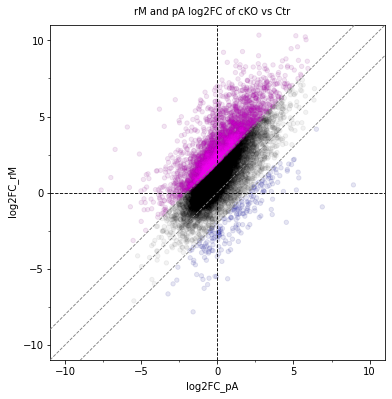

<ggplot: (8792679165921)>

In [12]:
# plot log2FC
plot = (
    p9.ggplot()
    + p9.geom_point(df_rM_pA_GV_short, 
                  p9.aes(x='log2FC_pA', y='log2FC_rM'), size=2,alpha=0.05)
    + p9.geom_point(rM_specific, 
                  p9.aes(x='log2FC_pA', y='log2FC_rM'), size=2,alpha=0.05,color = 'magenta')
    + p9.geom_point(pA_specific, 
                  p9.aes(x='log2FC_pA', y='log2FC_rM'), size=2,alpha=0.05,color = 'blue')
    
#     + p9.scale_color_manual(breaks = 'group',
#                            values = ['blue','magenta','gray'])

    + p9.geom_abline(intercept = 0, slope = 1, linetype='dashed',color='gray')
    + p9.geom_abline(intercept = set_log2_diff_threshold, slope = 1, linetype='dashed',color='gray')
    + p9.geom_abline(intercept = -set_log2_diff_threshold, slope = 1, linetype='dashed',color='gray')
    + p9.geom_vline(xintercept = 0, linetype='dashed')
    + p9.geom_hline(yintercept = 0, linetype='dashed')
    + p9.theme(void)
#     + p9.facet_wrap("genotype")
    + p9.xlab('log2FC_pA')
    + p9.ylab('log2FC_rM')
    + p9.labs(title = 'rM and pA log2FC of cKO vs Ctr')
    + p9.coord_fixed(ratio=1, xlim=(-10,10),ylim=(-10,10))
)
plot
# plot.save("../results/pAvsrM/" + "log2FC_" + str(set_log2_diff_threshold) + ".pdf", height=4, width=4)


In [14]:
# write to csv:
df_rM_pA_GV_short.to_csv("../results/df_rM_pA_GV_short_2.csv")